In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform = transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = '/home/zihengh1/CV_Final/CSRNet-pytorch'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root, 'part_A_final/train_data','images')
part_A_test = os.path.join(root, 'part_A_final/test_data','images')
part_B_train = os.path.join(root, 'part_B_final/train_data','images')
part_B_test = os.path.join(root, 'part_B_final/test_data','images')

In [5]:
path_sets = [part_A_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model_A = CSRNet()
model_A = model_A.cuda()
checkpoint = torch.load('0model_best.pth.tar')
model_A.load_state_dict(checkpoint['state_dict'])
model_A

CSRNet(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [8]:
import random 
random.randint(0, 5)

5

In [8]:
predict = []
answer = []
mae = []
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model_A(img.unsqueeze(0))
    pred = output.detach().cpu().sum().numpy()
    ans = np.sum(groundtruth)
    predict.append(pred)
    answer.append(ans)
    mae.append(abs(pred - ans))
    
print(sum(mae) / len(mae))

100%|██████████| 182/182 [00:12<00:00, 14.84it/s]

89.02582283858415


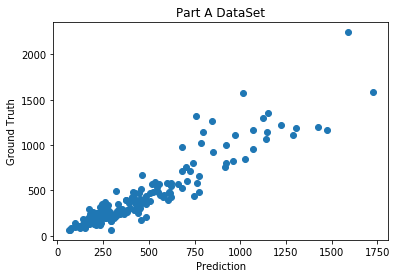

In [9]:
plt.scatter(predict, answer)
plt.title("Part A DataSet")
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.show()

Predicted Count :  1139


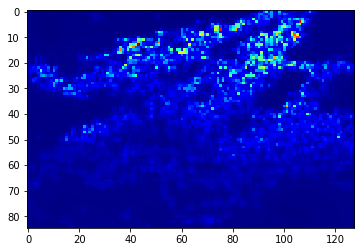

Original Count :  1064


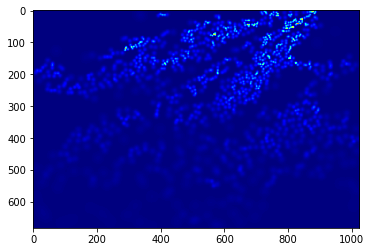

Original Image


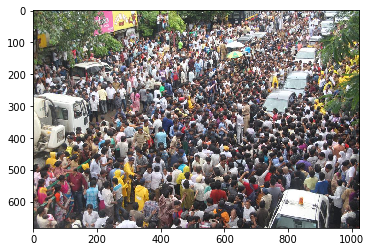

In [31]:
img = transform(Image.open('./part_A_final/test_data/images/IMG_11.jpg').convert('RGB')).cuda()
output = model_A(img.unsqueeze(0))

print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2], output.detach().cpu().shape[3]))
plt.imshow(temp, cmap = CM.jet)
plt.show()

temp = h5py.File('./part_A_final/test_data/ground_truth/IMG_11.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1, cmap = CM.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()

print("Original Image")
plt.imshow(plt.imread('./part_A_final/test_data/images/IMG_11.jpg'))
plt.show()

In [11]:
path_sets = [part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [12]:
model_B = CSRNet()
model_B = model_B.cuda()
checkpoint = torch.load('1model_best.pth.tar')
model_B.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [13]:
predict = []
answer = []
mae = []
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model_B(img.unsqueeze(0))
    pred = output.detach().cpu().sum().numpy()
    ans = np.sum(groundtruth)
    predict.append(pred)
    answer.append(ans)
    mae.append(abs(pred - ans))
    
print(sum(mae) / len(mae))

100%|██████████| 316/316 [00:30<00:00, 10.25it/s]

11.085965147501302


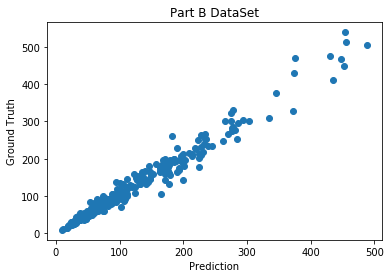

In [14]:
plt.scatter(predict, answer)
plt.title("Part B DataSet")
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.show()

Predicted Count :  174


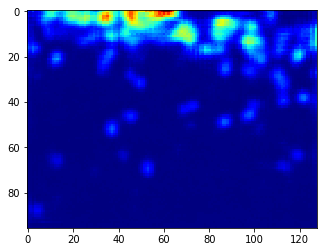

Original Count :  182


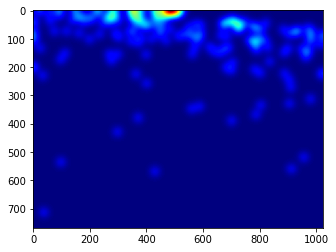

Original Image


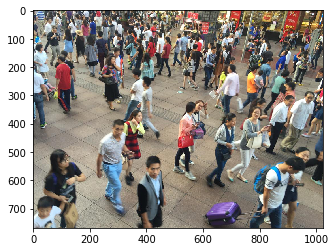

In [15]:
img = transform(Image.open('./part_B_final/test_data/images/IMG_10.jpg').convert('RGB')).cuda()
output = model_B(img.unsqueeze(0))

print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2], output.detach().cpu().shape[3]))
plt.imshow(temp, cmap = CM.jet)
plt.show()

temp = h5py.File('./part_B_final/test_data/ground_truth/IMG_10.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1, cmap = CM.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()

print("Original Image")
plt.imshow(plt.imread('./part_B_final/test_data/images/IMG_10.jpg'))
plt.show()

In [16]:
path_sets = [part_A_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [17]:
model_Best = CSRNet()
model_Best = model_Best.cuda()
checkpoint = torch.load('model_best.pth.tar')
model_Best.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [18]:
predict = []
answer = []
mae = []
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model_Best(img.unsqueeze(0))
    pred = output.detach().cpu().sum().numpy()
    ans = np.sum(groundtruth)
    predict.append(pred)
    answer.append(ans)
    mae.append(abs(pred - ans))
    
print(sum(mae) / len(mae))

100%|██████████| 182/182 [00:12<00:00, 15.05it/s]

75.69089721847367


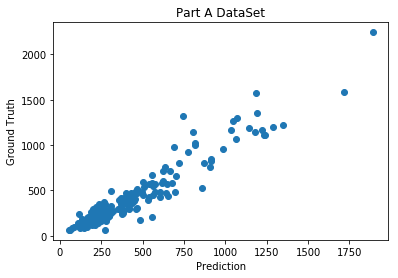

In [19]:
plt.scatter(predict, answer)
plt.title("Part A DataSet")
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.show()

Predicted Count :  469


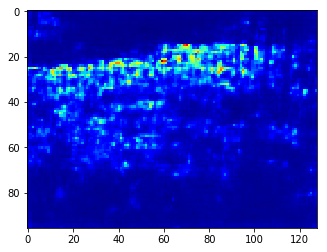

Original Count :  498


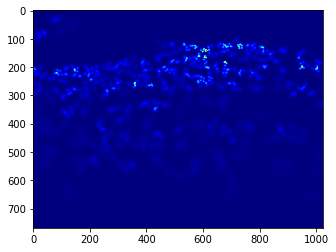

Original Image


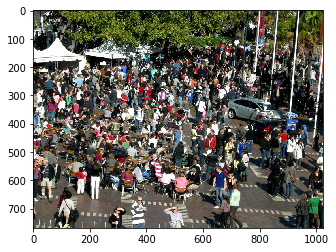

In [20]:
img = transform(Image.open('./part_A_final/test_data/images/IMG_10.jpg').convert('RGB')).cuda()
output = model_Best(img.unsqueeze(0))

print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2], output.detach().cpu().shape[3]))
plt.imshow(temp, cmap = CM.jet)
plt.show()

temp = h5py.File('./part_A_final/test_data/ground_truth/IMG_10.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1, cmap = CM.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()

print("Original Image")
plt.imshow(plt.imread('./part_A_final/test_data/images/IMG_10.jpg'))
plt.show()

Predicted Count :  139
Original Image


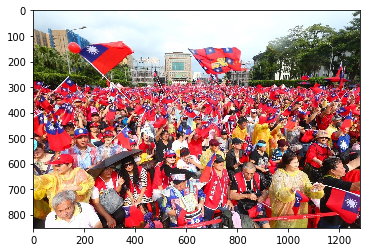

In [26]:
img = transform(Image.open('./Test/Han.jpg').convert('RGB')).cuda()
output = model_Best(img.unsqueeze(0))
print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))
print("Original Image")
plt.imshow(plt.imread('./Test/Han.jpg'))
plt.show()

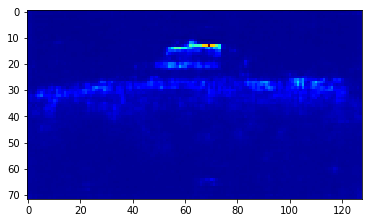

Predicted Count :  208
Original Image


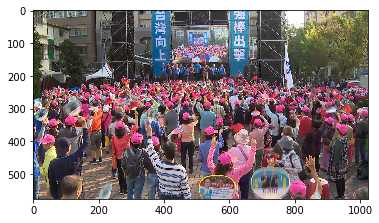

In [27]:
img = transform(Image.open('./Test/Han2.jpg').convert('RGB')).cuda()
output = model_Best(img.unsqueeze(0))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2], output.detach().cpu().shape[3]))
plt.imshow(temp, cmap = CM.jet)
plt.show()

print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))
print("Original Image")
plt.imshow(plt.imread('./Test/Han2.jpg'))
plt.show()

Predicted Count :  246
Original Image


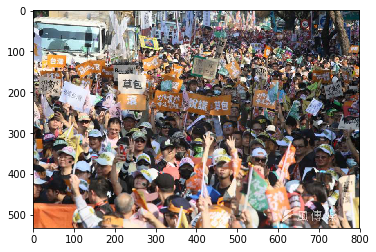

In [29]:
img = transform(Image.open('./Test/Han3.jpg').convert('RGB')).cuda()
output = model_Best(img.unsqueeze(0))
print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))
print("Original Image")
plt.imshow(plt.imread('./Test/Han3.jpg'))
plt.show()

Predicted Count :  1141


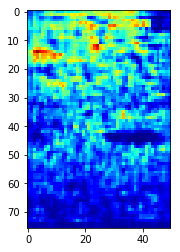

Original Count :  1187


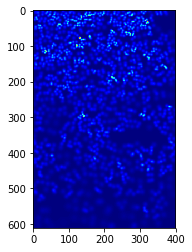

Original Image


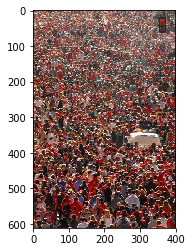

In [32]:
img = transform(Image.open('./part_A_final/test_data/images/IMG_115.jpg').convert('RGB')).cuda()
output = model_Best(img.unsqueeze(0))

print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2], output.detach().cpu().shape[3]))
plt.imshow(temp, cmap = CM.jet)
plt.show()

temp = h5py.File('./part_A_final/test_data/ground_truth/IMG_115.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1, cmap = CM.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()

print("Original Image")
plt.imshow(plt.imread('./part_A_final/test_data/images/IMG_115.jpg'))
plt.show()